# Assignment 1: Write an ipython notebook that demonstrates visually in a data-driven way the Central Limit Theorem.

In [114]:
import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
import scipy.stats as stats
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [84]:
mymean = 100
mysize = np.zeros(100)
while len(unique(mysize)) < 100 :
    mysize = np.random.randint(11,2000,100)
print(mysize)
print('\nThe length of the unique of mysize is {}!'.format(len(unique(mysize))))
mysize.shape

[ 467 1797  568 1261  113  414 1779  579 1104 1626  862 1103 1223  514 1433
 1768 1751 1414 1588  712 1911 1796 1801  639  128  548  732 1972 1346 1638
  273 1827 1844 1123 1010  519 1005  637  699  790  133  456  656  773 1441
   50   64 1016 1076  835  742  210 1525  906 1146 1149  355 1417 1038   57
 1064   63  648 1554 1700  746  302 1185 1460  745  257  522  733  627  955
  204  798  384 1282  542  939  866 1362   94  416  472 1808 1637 1782  672
  560 1422  816  116 1547 1777 1069 1518  596  803]

The length of the unique of mysize is 100!


(100,)

In [87]:
md = {}
md['normal'], md['pois'], md['chisq'], md['binom'], md['laplace'] = {}, {}, {}, {}, {}

df = mymean
mu = mymean

for n in mysize:
    md['normal'][n] = np.random.normal(mu, size = n)
    md['chisq'][n] = np.random.chisquare(df, size = n)
    md['pois'][n] = np.random.poisson(df, size = n)
    md['binom'][n] = np.random.binomial(200, 0.5, size = n)
    md['laplace'][n] = np.random.laplace(100,1, size = n)
    
# save the means for plotting later    

md['chisq']['means'], md['normal']['means'] , md['pois']['means'] , md['binom']['means'], md['laplace']['means'] = {}, {}, {}, {}, {}

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


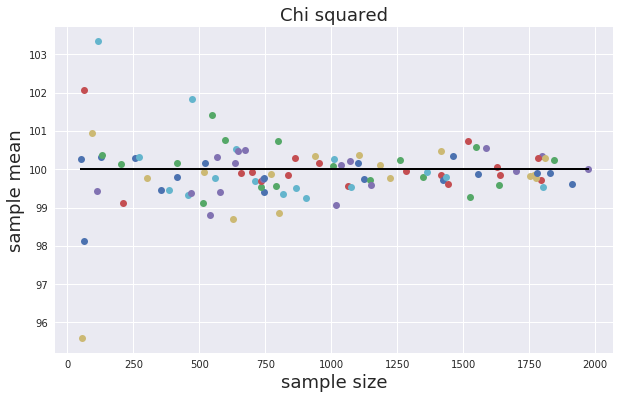

In [88]:
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

## Figure 1: This is Chi-squared distribution. Sample mean tend to be closer to population mean as sample size increase. It shows that sample with enough size could be used for infer population characteristics.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


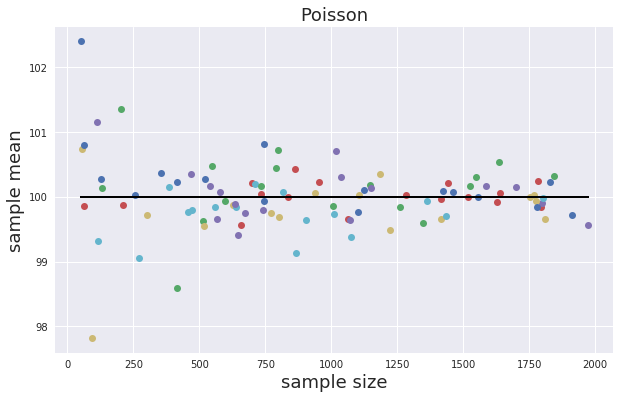

In [89]:
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

## Figure 2: This is Poisson distribution. Sample mean tend to be closer to population mean as sample size increase. It shows that sample with enough size could be used for infer population characteristics.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


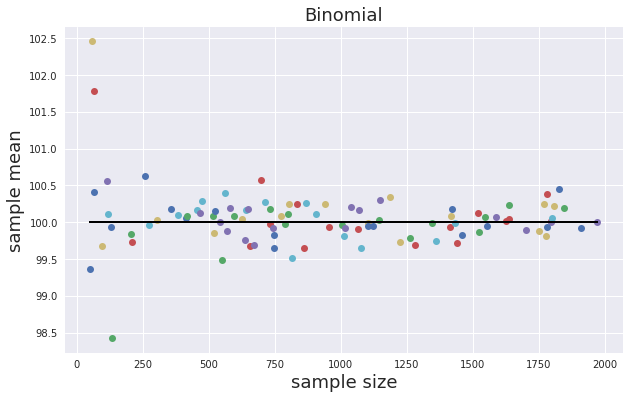

In [90]:
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binom']:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        #and plot it
        axbinom_mu_n.plot(nn, md['binom']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Binomial', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [100, 100], 'k')

## Figure 3: This is Binomial distribution. Sample mean tend to be closer to population mean as sample size increase. It shows that sample with enough size could be used for infer population characteristics.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


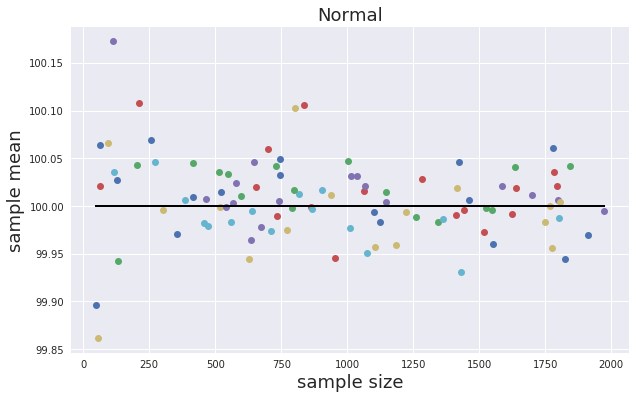

In [91]:
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [mu, mu], 'k')

## Figure 4: This is Normal distribution. Sample mean tend to be closer to population mean as sample size increase. It shows that sample with enough size could be used for infer population characteristics.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


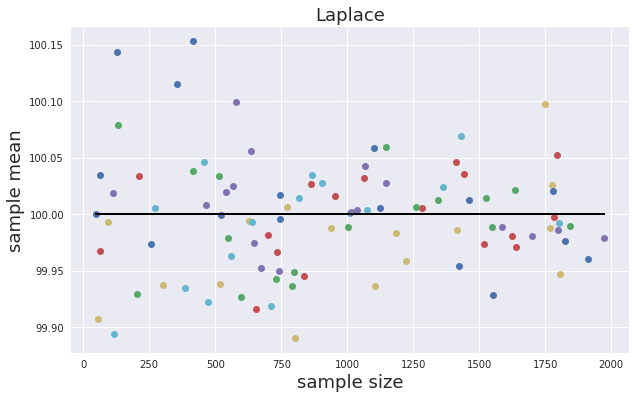

In [92]:
axlap_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for nn in md['laplace']:
    if not type(nn) == str:
        md['laplace']['means'][nn] = md['laplace'][nn].mean()
        #and plot it
        axlap_mu_n.plot(nn, md['laplace']['means'][nn], 'o')
        axlap_mu_n.set_xlabel('sample size', fontsize=18)
        axlap_mu_n.set_ylabel('sample mean', fontsize=18)
        axlap_mu_n.set_title('Laplace', fontsize=18)
        axlap_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

## Figure 5: This is Laplace distribution. Sample mean tend to be closer to population mean as sample size increase. It shows that sample with enough size could be used for infer population characteristics.

In [93]:
allmeans = []
a = list(md['chisq']['means'].values())
b = list(md['normal']['means'].values())
c = list(md['pois']['means'].values())
d = list(md['binom']['means'].values())
e = list(md['laplace']['means'].values())
set = [a,b,c,d,e]
for i in set:
    for j in i:
        allmeans.append(j)

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


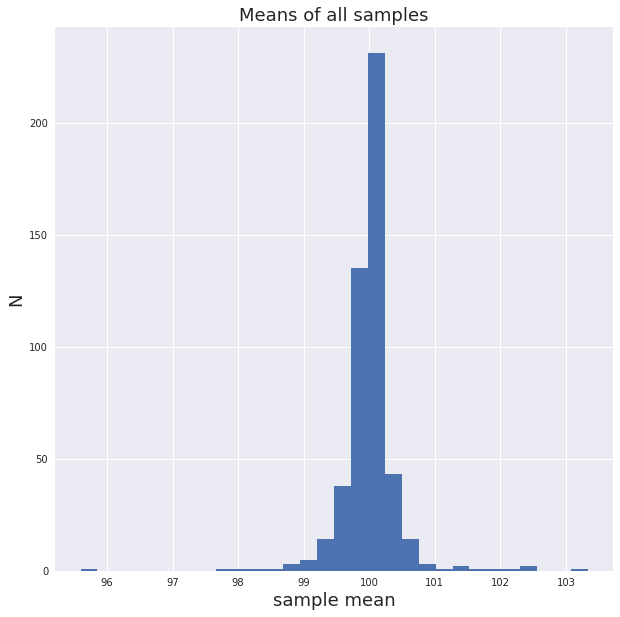

In [122]:
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Means of all samples', fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 6: This is means of all samples and it seems like gaussian distribution with satisfying the central limit theorem.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


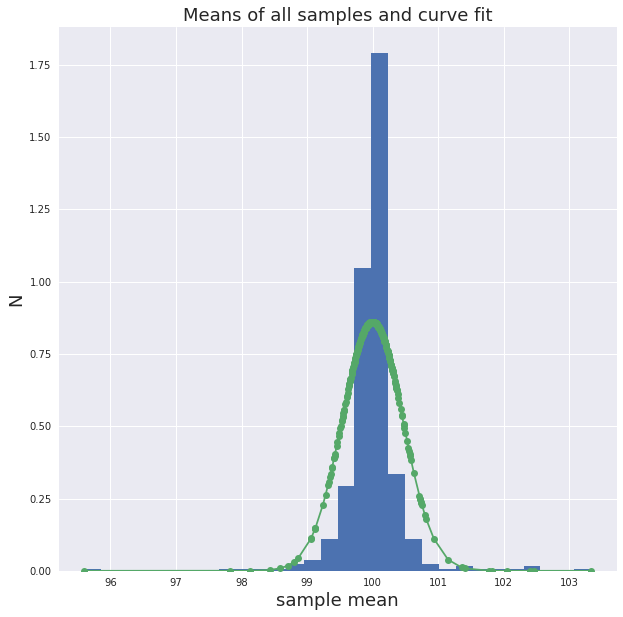

In [125]:
sort_allmeans = sorted(allmeans)
fit = stats.norm.pdf(sort_allmeans, np.mean(sort_allmeans), np.std(sort_allmeans))

pl.figure(figsize=(10, 10))
pl.hist(sort_allmeans,bins=30, normed=True)
pl.plot(sort_allmeans,fit,'-o')
pl.title('Means of all samples and curve fit', fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 7: This is the means of all samples with curve fit.